In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 199 
pd.options.display.width = 200

## Before vs After - Shop Level

In [6]:
before = pd.read_csv('Price Party Shop - CUU 0619.csv', encoding="ISO-8859-1")
after = pd.read_csv('Price Parity - Shop Level - 0626.csv', encoding="ISO-8859-1")

In [7]:
# Price Higher Dishes / Matched Dishes

print("-----Before")
print("Matched Dishes: ", before["didi_ue_match_dishes"].sum())
print("Higher Dishes Rate: ", before["didi_higher_ue_match_dishes"].sum()/before["didi_ue_match_dishes"].sum())

print("Difference in Price %: ", before["diff_in_price_percent"].mean())
print("R count with index > 0: ", len(before[before["price_adjustment_index"]>0].shop_id.unique()))


print("\n-----After")
print("Matched Dishes: ", after["didi_ue_match_dishes"].sum())
print("Higher Dishes Rate: ", after["didi_higher_ue_match_dishes"].sum()/after["didi_ue_match_dishes"].sum())

print("Difference in Price %: ", after["diff_in_price_percent"].mean())
print("R count with index > 0: ", len(after[after["price_adjustment_index"]>0].shop_id.unique()))

-----Before
Matched Dishes:  4286
Higher Dishes Rate:  0.4003733084461036
Difference in Price %:  13.550506329113928
R count with index > 0:  158

-----After
Matched Dishes:  4565
Higher Dishes Rate:  0.3778751369112815
Difference in Price %:  13.836325301204816
R count with index > 0:  166


## Dish Level

The dishes csv are one file per date

In [9]:
### Parameters
from_date = "2021-06-19"
after_date = "2021-06-26"

In [11]:
#list of dates between the two given parameters above
date_list = [str((pd.to_datetime(from_date) + datetime.timedelta(days=i)).date()).replace("-","")[4:] for i in range(int((pd.to_datetime(after_date).date() - pd.to_datetime(from_date).date()).days)+1)]

In [12]:
#The dishes csv are one file per date -> Reading every csv and concating it to one same dataframe
#get the dish data for the date_list
dish_df = pd.DataFrame()
for date in date_list:
    #the csv files should have the correct format name : Price Parity - Dish Level - DateFormatNeeded.csv
    dish_df = pd.concat([dish_df,pd.read_csv("Price Parity - Dish Level - %s.csv" % date)])

In [13]:
# Removing the shops that are no longer in partnership with DiDi
dish_df = dish_df[~(dish_df["shop_id"].isin([
    "s5764607588252254338"
    ,"s5764607590437486798"
    ,"s5764607618761621749"
    ,"s5764607626697244802"
    ,"s5764607631008989316"
    ,"s5764607639598923906"
    ,"s5764607671173644424"
    ,"s5764607671710515336"
    ,"s5764607739779874950"
    ,"s5764607740971057286"
    ,"s5764607778010955905"]))].copy()

In [14]:
# Comparing dishes between dates -> Calculating Price gap and Gap Rate
dish_df["price_gap"] = dish_df["didi_dish_price"] - dish_df["comp_dish_price"]
dish_df["gap_rate"] = dish_df["price_gap"] / dish_df["comp_dish_price"] * 100

In [55]:
# Dishes from the first list -> remain with dishes with a gap rate below 0
dish_list = dish_df[(dish_df["date_"] == "2021/6/19") & (dish_df["gap_rate"] > 0)].dish_id.unique()

In [56]:
# Excluding other dishes
dish_df = dish_df[(dish_df.dish_id.isin(dish_list))].copy()

In [57]:
# Overview

print("Number of Dishes:", len(dish_df[(dish_df["date_"] == "2021/6/19") & (dish_df["price_gap"] > 0)]))
#Number of shops with higher prices
print("Number of Shops:", len(dish_df[(dish_df["date_"] == "2021/6/19") & (dish_df["price_gap"] > 0)].shop_id.unique()))
#Count of all the BDs for those 
print("Number of BDs:", len(dish_df[(dish_df["date_"] == "2021/6/19") & (dish_df["price_gap"] > 0)].bd_user_name.unique()))

Number of Dishes: 1621
Number of Shops: 147
Number of BDs: 19


In [58]:
dish_df = dish_df[dish_df["gap_rate"] > 0].copy()

In [59]:
dish_trend = dish_df.groupby("date_").count()["dish_id"].to_frame()
dish_trend

,dish_id
date_,
2021/6/19,1621
2021/6/20,1613
2021/6/21,1600
2021/6/22,1600
2021/6/23,1593
2021/6/24,1597
2021/6/25,1594
2021/6/26,1497


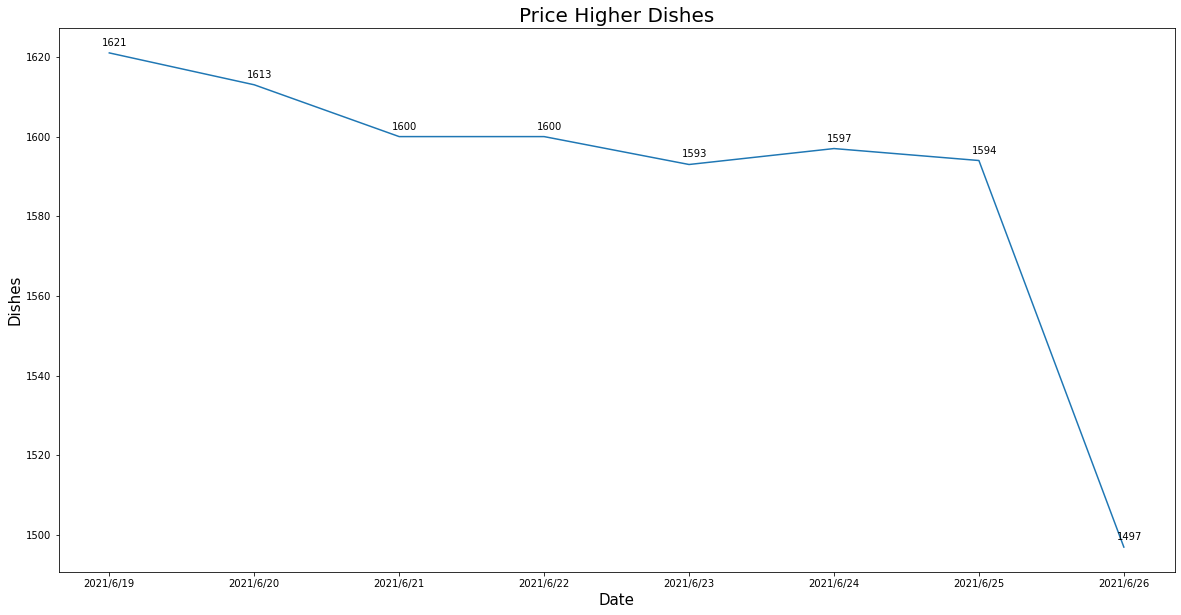

In [61]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)


plt.plot(dish_trend["dish_id"])
plt.title("Price Higher Dishes",fontsize=20)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Dishes",fontsize=15)

for i, v in enumerate(dish_trend["dish_id"].values):
    ax.annotate(str(round(v,2)), xy=(i,v), xytext=(-7,7), textcoords='offset points')

In [64]:
shop_trend = dish_df.groupby("date_").apply(lambda x: len(x["shop_id"].unique())).to_frame()
shop_trend.columns = ["shops"]

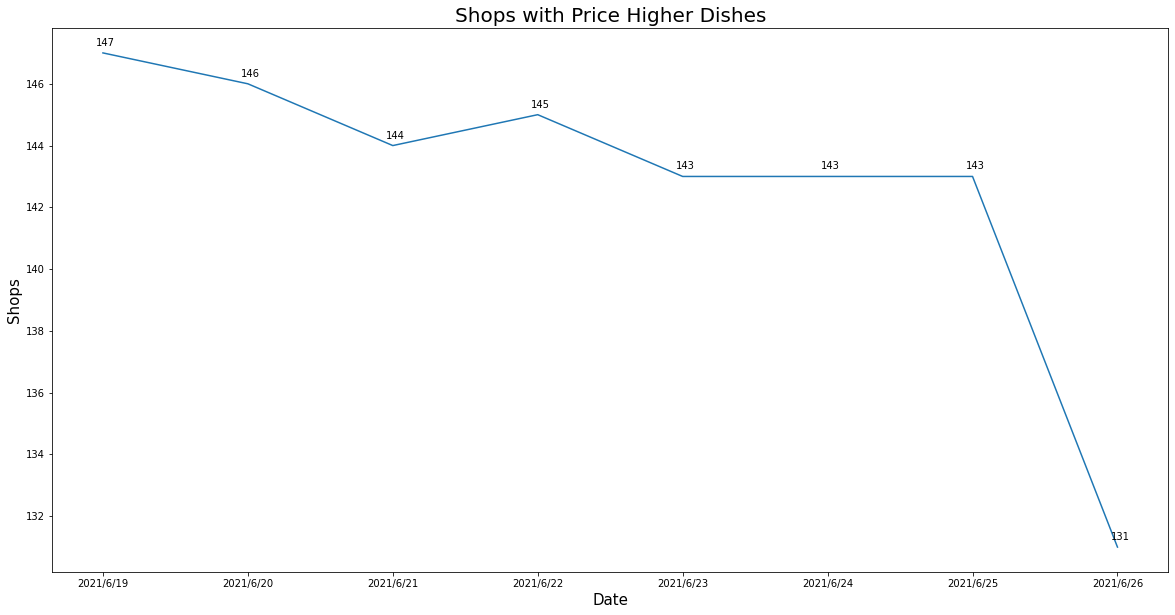

In [66]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)


plt.plot(shop_trend["shops"])
plt.title("Shops with Price Higher Dishes",fontsize=20)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Shops",fontsize=15)

for i, v in enumerate(shop_trend["shops"].values):
    ax.annotate(str(round(v,2)), xy=(i,v), xytext=(-7,7), textcoords='offset points')

## BD Performance

In [67]:
#dishes per BD
bd_peform_dishes = dish_df[dish_df["date_"].isin(["2021/6/19", "2021/6/26"])].groupby(["date_", "bd_user_name"]).apply(lambda x: len(x["dish_id"].unique())).to_frame()

In [69]:
bd_peform_dishes

0
date_     bd_user_name                             
2021/6/19 |alfonsovillegas|                       9
          |alfredo.carrillo_v|                  187
          |dillery.burciaga_v|                   86
          |eduardo.munoz_v|                      89
          |erik.demian_v|                       130
          |francisco.quintana_v|                 23
          |gsalomongarcia|                      308
          |gsalomongarcia|mariana.rodriguez_v|   77
          |hugo.vazquez_v|                      101
          |jese.telles_v|                       180
          |luis.ocampo_v|                        31
          |luis.olvera_v|                         3
          |lydia.hinojos_v|                      83
          |mariano.vega_v|                        9
          |mata.marlen.pf_v|                     21
          |pavel.marquez_v|                      21
          |perla.avila_v|                        50
          |rafael.ponce_v|                      100
2021/6/26 |alfonsovillegas|                       7
          |alfredo.carrillo_v|                  179
          |dillery.burciaga_v|                   85
          |eduardo.munoz_v|                      87
          |erik.demian_v|                       100
          |francisco.quintana_v|                 22
          |gsalomongarcia|                      308
          |gsalomongarcia|mariana.rodriguez_v|   77
          |hugo.vazquez_v|                       96
          |jese.telles_v|                       171
          |luis.ocampo_v|                        30
          |lydia.hinojos_v|                      72
          |mariano.vega_v|                        9
          |mata.marlen.pf_v|                     10
          |pavel.marquez_v|                      19
          |perla.avila_v|                        36
          |rafael.ponce_v|                      100

In [68]:
#shops per bd
bd_peform_shops = dish_df[dish_df["date_"].isin(["2021/6/19", "2021/6/26"])].groupby(["date_", "bd_user_name"]).apply(lambda x: len(x["shop_id"].unique())).to_frame()

In [70]:
bd_peform_shops

0
date_     bd_user_name                            
2021/6/19 |alfonsovillegas|                      1
          |alfredo.carrillo_v|                  14
          |dillery.burciaga_v|                   4
          |eduardo.munoz_v|                     12
          |erik.demian_v|                       13
          |francisco.quintana_v|                 6
          |gsalomongarcia|                       4
          |gsalomongarcia|mariana.rodriguez_v|   1
          |hugo.vazquez_v|                      12
          |jese.telles_v|                       25
          |luis.ocampo_v|                        8
          |luis.olvera_v|                        1
          |lydia.hinojos_v|                      8
          |mariano.vega_v|                       2
          |mata.marlen.pf_v|                     4
          |pavel.marquez_v|                      4
          |perla.avila_v|                        4
          |rafael.ponce_v|                      18
2021/6/26 |alfonsovillegas|                      1
          |alfredo.carrillo_v|                  13
          |dillery.burciaga_v|                   4
          |eduardo.munoz_v|                     11
          |erik.demian_v|                       12
          |francisco.quintana_v|                 5
          |gsalomongarcia|                       4
          |gsalomongarcia|mariana.rodriguez_v|   1
          |hugo.vazquez_v|                      10
          |jese.telles_v|                       24
          |luis.ocampo_v|                        7
          |lydia.hinojos_v|                      7
          |mariano.vega_v|                       2
          |mata.marlen.pf_v|                     2
          |pavel.marquez_v|                      3
          |perla.avila_v|                        3
          |rafael.ponce_v|                      18